<div style="text-align: right"> Выполнила студентка гр. 5030103/90201 Егорова Екатерина </div>

## Шаг 0. Загрузка df

In [1]:
# загрузим датафрейм
import pandas as pd

df = pd.read_csv("train_dataset_train.csv")

In [2]:
# посмотрим на датафрейм
df.head(15)

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017
5,6,A18692B5936C0B1689B8B3D904959534,СК студента 30 дней,103,Аэропорт ( Северный ),2003,Аэропорт,2,Замоскворецкая,2022-09-12 05:02:56,148.683333,11012
6,7,31CEE36AE183CF0EF7E4687993E8CC0E,Пропуск FacePay,2258,Косино (Первый),15001,Косино,15,Некрасовская,2022-09-12 05:02:59,192.150000,15001
7,8,EDFA01D6A6157E0716138DAA074ED974,Пропуск FacePay,2117,Котельники(Первый),7007,Котельники,7,Таганско-Краснопресненская,2022-09-12 05:03:00,229.400000,7014
8,9,532322AC5CDB5C0FE8C1F6308F9C2B7F,90 дней,103,Аэропорт ( Северный ),2003,Аэропорт,2,Замоскворецкая,2022-09-12 05:03:03,720.616667,5007
9,10,758C7FAEE0C3867835F6A16A0D05DCDD,СК студента 30 дней,107,Сокол ( Южн./Вост. ),2018,Сокол,2,Замоскворецкая,2022-09-12 05:04:31,329.433333,6018


## Шаг 1.1 Базовый EDA

Что знаем о данных по ТЗ?

_Описательные столбцы_:

- `id` - уникальный идентификатор столбца;
- `ticket_id` - уникальный идентификатор билета, считается, что у одного
билета один владелец
- `ticket_type_nm` - тип билета
- `entrance_id` - уникальный id входа в станцию
- `entrance_nm` - название
- `station_id` - уникальное id станции захода
- `station_nm` - наименование станции захода
- `line_id` - уникальный id ветки на, которой находится станция
- `line_nm` - наименование ветки, на которой находится станция
- `pass_dttm` - дата валидации

_Столбцы для предикта_:

- `time_to_under` - сколько времени прошло между первой и второй валидацией
- `label` - id второй станции, на которой произошла валидация

In [3]:
# 1091021 запись, 12 столбцов
df.shape

(1091021, 12)

In [4]:
# ого!! дупликатов нет

df = df.drop_duplicates()
df.shape

(1091021, 12)

In [5]:
df.dtypes

id                  int64
ticket_id          object
ticket_type_nm     object
entrance_id         int64
entrance_nm        object
station_id          int64
station_nm         object
line_id             int64
line_nm            object
pass_dttm          object
time_to_under     float64
label               int64
dtype: object

In [6]:
# na нет!! ура
df.isna().sum()

id                0
ticket_id         0
ticket_type_nm    0
entrance_id       0
entrance_nm       0
station_id        0
station_nm        0
line_id           0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

In [7]:
df.nunique(axis=0)

id                1091021
ticket_id          335533
ticket_type_nm         60
entrance_id           426
entrance_nm           426
station_id            276
station_nm            245
line_id                16
line_nm                16
pass_dttm          297040
time_to_under       60514
label                 276
dtype: int64

Видим, что `entrance_id` и `entrance_nm` имеют одинаковое количество уникальных значений, аналогично `line_id` и `line_nm`. Можем сделать вывод, что оба поля несут одинаковую категориальную информацию, однако id показывает его численную интерпретацию, а nm - текствое имя.

В остальном - ничего непонятно, но очень интересно. Смущает, что уникальных значений в `station_id` и `station_nm` разное количество. Посмотрим на них:

In [8]:
stations_desc = df.groupby(['station_id','station_nm']).size().reset_index().rename(columns={0:'count'})
stations_desc.head(15)

,station_id,station_nm,count
0,1002,Бульвар Рокоссовского,8324
1,1003,Воробьёвы горы,244
2,1004,Комсомольская,1918
3,1005,Красносельская,2397
4,1006,Красные Ворота,1178
5,1007,Кропоткинская,717
6,1008,Лубянка,595
7,1009,Охотный ряд,826
8,1011,Преображенская площадь,11139
9,1012,Проспект Вернадского,6716


In [9]:
# теперь выберем из этого датасета неуникальные значения по station_nm
stations_stats = stations_desc[stations_desc.duplicated(subset=['station_nm'],keep=False)].sort_values('station_nm')
stations_stats

,station_id,station_nm,count
137,8001,Авиамоторная,5281
199,11008,Авиамоторная,393
24,2001,Автозаводская,5221
225,14001,Автозаводская,738
46,3001,Арбатская,823
69,4002,Арбатская,158
27,2004,Белорусская,2478
80,5001,Белорусская,3565
229,14005,Ботанический сад,1329
96,6005,Ботанический сад,3448


А теперь сделаем джоин с основным датафреймом и узнаем, что...

In [10]:
joined = pd.merge(stations_stats, df[['station_id', 'station_nm', 'line_id']].drop_duplicates(), how='left', left_on=['station_id', 'station_nm'], right_on=['station_id', 'station_nm'])
joined[['station_id', 'station_nm', 'line_id']]

,station_id,station_nm,line_id
0,8001,Авиамоторная,8
1,11008,Авиамоторная,11
2,2001,Автозаводская,2
3,14001,Автозаводская,14
4,3001,Арбатская,3
5,4002,Арбатская,4
6,2004,Белорусская,2
7,5001,Белорусская,5
8,14005,Ботанический сад,14
9,6005,Ботанический сад,6


... что в Москве оказывается несколько станций на разных линиях с одинаковыми названиями!! 🥰🥰🥰

Аналогично посмотрим, что из себя представляет код билета. Возьмем неуникальное значение и узнаем, чем отличаются записи друг от друга:

In [11]:
tickets = df.groupby(['ticket_id']).size().reset_index(name='count').sort_values('count', ascending=False)
new_tickets = tickets.loc[tickets['count'] > 1]
new_tickets

,ticket_id,count
28439,15A93BB90FA63B7D1910B4C72EEA8AC6,8
159687,7992E92F9AE0F7506BD439547FD7E11F,8
31943,18572BB4547B65C8DE530F7EE3A4875B,7
90865,4548339BF47C8A6A48668256F2536113,7
172814,8384F5FD62C4F533FD987862F9D1ECC1,7
...,...,...
173387,83F8086C06A73B5526B766FE712DE851,2
129594,62D15DA5E85A8EEC50E306FAC261066D,2
218320,A634DAC2990BD22C54B9D78753AB95B4,2
91408,45AD307A16FB59DB03C5D2BE81D8B420,2


Видим, что имеются 265232 билета, которые используются больше двух раз в день, т.е. скорее всего принадлежат одному и тому же человеку.

In [12]:
df[df['ticket_id'] == new_tickets.iloc[0]['ticket_id']]

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
2451,2452,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,310,Волгоградский проспект (Восточный),7003,Волгоградский проспект,7,Таганско-Краснопресненская,2022-09-12 05:49:30,892.350000,9018
219001,219002,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-13 07:45:01,787.966667,9018
421875,421876,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-14 08:30:04,705.716667,9018
569346,569347,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-15 08:04:48,836.150000,9018
708592,708593,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-16 07:21:58,808.033333,9018
902175,902176,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-17 09:43:23,749.466667,7008
1003239,1003240,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,378,Серпуховская,9018,Серпуховская,9,Серпуховско-Тимирязевская,2022-09-18 08:26:40,602.966667,7007
1090920,1090921,15A93BB90FA63B7D1910B4C72EEA8AC6,30 дней ЕДИНЫЙ ТК,366,Савёловская,9016,Савёловская,9,Серпуховско-Тимирязевская,2022-09-19 00:18:40,40.750000,9014


Действительно, билет идентифицирует одного юзера метро. 

Теперь, наконец, посмотрим на фичу с датой и попытаемся понять ее характеристики. 

In [13]:
date_time = df[['pass_dttm']]
date_time.min()

pass_dttm    2022-09-12 05:00:13
dtype: object

In [14]:
date_time.max()

pass_dttm    2022-09-19 04:10:42
dtype: object

Видим, что данные взяты всего за одну календарную неделю. Не забудем преобразовать данные в тип `datetime`:

In [15]:
df['pass_dttm'] = pd.to_datetime(df.pass_dttm)

Соберем все, что узнали, в свобдную таблицу перед Feature Engineering.

|Фича|Тип|Комментарий|
|---|---|---|
|`id`|Numeric/дискретный| Просто номер записи, уникальный ключ. Можно дропнуть|
|`ticket_id`|Text| Код билета. | Означает номер билета в страшной записи. (надо распарсить) |
|`ticket_type_nm`| Text/категориальный | Категория билета |
|`entrance_id`|Numeric/дискретный|Номер входа. Однозначно идентифицирует вход|
|`entrance_nm`|Text/дискретный|Имя входа. Можно дропнуть, потому что копирует предыдущий столбец по смыслу |
|`station_id`|Numeric/дискретный| Номер станции. Однозначно идентифицирует станцию|
|`station_nm`|Text/дискретный| Название станции. Можно дропнуть, потому что копирует предыдущий столбец по смыслу|
|`line_id`|Numeric/дискретный| Номер линии |
|`line_nm`|Text/дискретный| Название линии. Можно дропнуть, потому что копирует предыдущий столбец по смыслу |
|`pass_dttm`| Формат дата/время (time series) | Время входа на станцию (точно надо распарсить) |

Что касается фичей для предикта:

|Фича|Тип|Комментарий|
|---|---|---|
|`time_to_under`|Float/непрерывный| Время, проведенное в подземке в непонятных условных единицах|
|`label`|Numeric/дискретный| Код станции выхода. Означает номер станции выхода. Диапазон значений - такой же, как и у `entrance_id`|

#### Посмотрим, что лежит в subway.csv

(бесполезная часть)

In [16]:
dictionary = pd.read_csv('subway.csv')
dictionary.head()

,Unnamed: 0,global_route_id,route_id,route_num,start_station_id,start_station_nm,start_line_id,start_line_nm,all_stations_id,all_stations_nm,station_cnt,transit_cnt,sector_cnt,alternative_route_cnt,route_dur,optimal_route_delta
0,0,7018_10001,10001_7018,9,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",26,3,4,30,64.59,8.58
1,1,7018_10001,10001_7018,1,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",23,1,2,30,56.01,0.00
2,2,7018_10001,10001_7018,2,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",25,2,3,30,61.01,5.00
3,3,7018_10001,10001_7018,3,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",26,2,3,30,61.81,5.80
4,4,7018_10001,10001_7018,4,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",25,2,3,30,62.01,6.00


In [17]:
dictionary.shape

(2991571, 16)

Посмотрим еще раз на данные в словаре, чтобы убрать ненужное:

In [18]:
dictionary.corr()

,Unnamed: 0,route_num,start_station_id,start_line_id,station_cnt,transit_cnt,sector_cnt,alternative_route_cnt,route_dur,optimal_route_delta
Unnamed: 0,1.000000,-0.012453,-0.005209,-0.005209,-0.007816,-0.002397,-0.005012,-0.017203,-0.007789,-0.002486
route_num,-0.012453,1.000000,0.086801,0.086803,0.289026,0.388557,0.369299,0.724502,0.297798,0.464836
start_station_id,-0.005209,0.086801,1.000000,1.000000,0.174132,0.082423,0.093788,0.119807,0.284385,-0.049759
start_line_id,-0.005209,0.086803,1.000000,1.000000,0.174133,0.082423,0.093789,0.119810,0.284386,-0.049759
station_cnt,-0.007816,0.289026,0.174132,0.174133,1.000000,0.291808,0.472127,0.282842,0.941023,0.146610
transit_cnt,-0.002397,0.388557,0.082423,0.082423,0.291808,1.000000,0.713250,0.202582,0.282363,0.416809
sector_cnt,-0.005012,0.369299,0.093788,0.093789,0.472127,0.713250,1.000000,0.237009,0.441708,0.354167
alternative_route_cnt,-0.017203,0.724502,0.119807,0.119810,0.282842,0.202582,0.237009,1.000000,0.293278,0.080217
route_dur,-0.007789,0.297798,0.284385,0.284386,0.941023,0.282363,0.441708,0.293278,1.000000,0.130772
optimal_route_delta,-0.002486,0.464836,-0.049759,-0.049759,0.146610,0.416809,0.354167,0.080217,0.130772,1.000000


<AxesSubplot:>

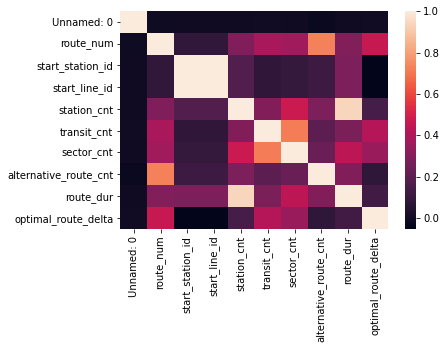

In [19]:
import seaborn as sns

sns.heatmap(dictionary.corr())

__Что видим?__

Видим, что нам точно не нужны колонки `global_route_id`, `route_id`, `start_station_nm`, `start_line_nm`, а также колонка с айди. Также видим достаточно высокую (> 0.7) корреляцию между признаком `sector_cnt` и `transit_cnt`, для того, чтобы можно было дропнуть `sector_cnt` и не разбираться, что он значит. 

Также отбросим номер маршрута `route_num`, т.к. он имеет высокую корреляцию с признаком `alternative_route_cnt`.

Оставим только то, что теоретически может представлять ценность:

In [20]:
dictionary = dictionary[['start_station_id', 'all_stations_id', 'station_cnt', 'transit_cnt', 'alternative_route_cnt', 'route_dur', 'optimal_route_delta']]
dictionary.head()

,start_station_id,all_stations_id,station_cnt,transit_cnt,alternative_route_cnt,route_dur,optimal_route_delta
0,10001,"[10001,10013,10002,10011,10005,10016,10009,100...",26,3,30,64.59,8.58
1,10001,"[10001,10013,10002,10011,10005,10016,10009,100...",23,1,30,56.01,0.00
2,10001,"[10001,10013,10002,10011,10005,10016,10009,100...",25,2,30,61.01,5.00
3,10001,"[10001,10013,10002,10011,10005,10016,10009,100...",26,2,30,61.81,5.80
4,10001,"[10001,10013,10002,10011,10005,10016,10009,100...",25,2,30,62.01,6.00


Теперь распарсим таргетную станцию из `all_stations_id`:

In [21]:
dictionary['all_stations_id'] = dictionary['all_stations_id'].apply(lambda x: x[1:-1].split(',')[-1])
dictionary = dictionary.rename(columns={'all_stations_id': 'target_station_id'})

In [22]:
dictionary.head()

,start_station_id,target_station_id,station_cnt,transit_cnt,alternative_route_cnt,route_dur,optimal_route_delta
0,10001,7018,26,3,30,64.59,8.58
1,10001,7018,23,1,30,56.01,0.00
2,10001,7018,25,2,30,61.01,5.00
3,10001,7018,26,2,30,61.81,5.80
4,10001,7018,25,2,30,62.01,6.00


## Шаг 1.2 Базовый feature engineering
 
Как было указано раньше, можем дропнуть столбцы `id`, `entrance_nm`, `station_nm`, `line_nm`:

In [23]:
df = df.drop(['id', 'entrance_nm', 'station_nm', 'line_nm'], axis=1)

In [24]:
df.head()

,ticket_id,ticket_type_nm,entrance_id,station_id,line_id,pass_dttm,time_to_under,label
0,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,11007,11,2022-09-12 05:00:13,216.316667,8001
1,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,2006,2,2022-09-12 05:00:54,648.183333,9011
2,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,2006,2,2022-09-12 05:00:55,865.333333,7022
3,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,2006,2,2022-09-12 05:01:13,1048.233333,2022
4,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,2006,2,2022-09-12 05:02:55,965.600000,2017


_Что дальше?_

- непонятно, что делать с `ticket_id`. Сделаем переменную, которая характеризует количество входов в метро. Для >1 хотелось бы использовать метрики рексиса, но это сложно :):):):) поэтому не будем
- заменим текстовые значения `ticket_type_nm` на категориальные числа
- надо как-то распарсить дату, для этого визуализируем данные. Уже знаем, что данные взяты всего за одну календарную неделю.

In [25]:
df = df.merge(tickets, left_on='ticket_id', right_on='ticket_id')
df = df.rename(columns={'count': 'ticket_used'})
df = df.drop('ticket_id', axis=1)

In [27]:
df.head(10)

,ticket_type_nm,entrance_id,station_id,line_id,pass_dttm,time_to_under,label,ticket_used
0,Пропуск FacePay,2402,11007,11,2022-09-12 05:00:13,216.316667,8001,1
1,СК учащегося 30 дней,110,2006,2,2022-09-12 05:00:54,648.183333,9011,5
2,СК учащегося 30 дней,110,2006,2,2022-09-13 08:09:02,451.116667,9011,5
3,СК учащегося 30 дней,110,2006,2,2022-09-15 09:46:43,468.750000,9011,5
4,СК учащегося 30 дней,110,2006,2,2022-09-17 11:50:21,253.383333,9011,5
5,СК учащегося 30 дней,110,2006,2,2022-09-18 16:09:53,133.583333,6022,5
6,БСК дружинника г.Москвы,110,2006,2,2022-09-12 05:00:55,865.333333,7022,5
7,БСК дружинника г.Москвы,110,2006,2,2022-09-14 09:50:36,535.433333,7022,5
8,БСК дружинника г.Москвы,110,2006,2,2022-09-15 09:41:33,588.850000,7022,5
9,БСК дружинника г.Москвы,110,2006,2,2022-09-16 09:51:29,704.366667,7022,5


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_ticket = le.fit_transform(df['ticket_type_nm'])

df['ticket_type_nm'] = new_ticket

In [29]:
df.head(10)

,ticket_type_nm,entrance_id,station_id,line_id,pass_dttm,time_to_under,label,ticket_used
0,40,2402,11007,11,2022-09-12 05:00:13,216.316667,8001,1
1,53,110,2006,2,2022-09-12 05:00:54,648.183333,9011,5
2,53,110,2006,2,2022-09-13 08:09:02,451.116667,9011,5
3,53,110,2006,2,2022-09-15 09:46:43,468.750000,9011,5
4,53,110,2006,2,2022-09-17 11:50:21,253.383333,9011,5
5,53,110,2006,2,2022-09-18 16:09:53,133.583333,6022,5
6,26,110,2006,2,2022-09-12 05:00:55,865.333333,7022,5
7,26,110,2006,2,2022-09-14 09:50:36,535.433333,7022,5
8,26,110,2006,2,2022-09-15 09:41:33,588.850000,7022,5
9,26,110,2006,2,2022-09-16 09:51:29,704.366667,7022,5


Посмотрим, как распределены данные в зависимости от даты  и времени суток:

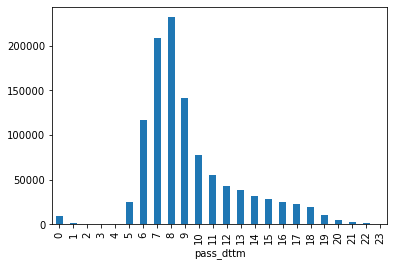

In [30]:
from matplotlib import pyplot as plt
import numpy as np

# распределение по часам. видим часы пик - 7-9 часов утра
res = df['pass_dttm'].groupby(df["pass_dttm"].dt.hour).count()
res.plot.bar()
plt.show()

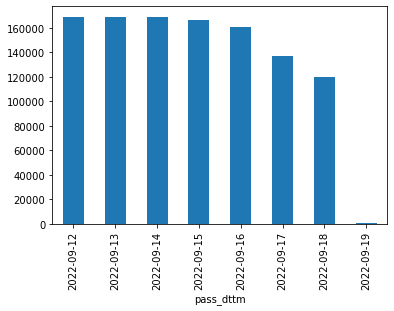

In [31]:
# видим более низкий поток людей в выходные. также снижается в пятницу

res = df['pass_dttm'].groupby(df["pass_dttm"].dt.date).count()
res.plot.bar()
plt.show()

In [32]:
import warnings
import datetime
warnings.filterwarnings('ignore')

# чтобы грамотно изобразить данные по дням недели, сделаем отдельный столбец
# c датой, отдельный - с временем и 
# заменим дату '2022-09-19' на '2022-09-12'

df['trans_date'] = df['pass_dttm'].dt.date
df['trans_hour'] = df['pass_dttm'].dt.hour
df.loc[df['trans_date'] == pd.Timestamp("2022.9.19"), 'trans_date'] = datetime.date(2022, 9, 12)
df

,ticket_type_nm,entrance_id,station_id,line_id,pass_dttm,time_to_under,label,ticket_used,trans_date,trans_hour
0,40,2402,11007,11,2022-09-12 05:00:13,216.316667,8001,1,2022-09-12,5
1,53,110,2006,2,2022-09-12 05:00:54,648.183333,9011,5,2022-09-12,5
2,53,110,2006,2,2022-09-13 08:09:02,451.116667,9011,5,2022-09-13,8
3,53,110,2006,2,2022-09-15 09:46:43,468.750000,9011,5,2022-09-15,9
4,53,110,2006,2,2022-09-17 11:50:21,253.383333,9011,5,2022-09-17,11
...,...,...,...,...,...,...,...,...,...,...
1091016,40,402,10022,10,2022-09-19 02:00:21,126.400000,10022,1,2022-09-12,2
1091017,40,2102,3016,3,2022-09-19 02:15:27,89.733333,3016,1,2022-09-12,2
1091018,40,2283,15005,15,2022-09-19 02:54:50,124.750000,15005,1,2022-09-12,2
1091019,40,118,2010,2,2022-09-19 03:17:00,91.283333,2010,1,2022-09-12,3


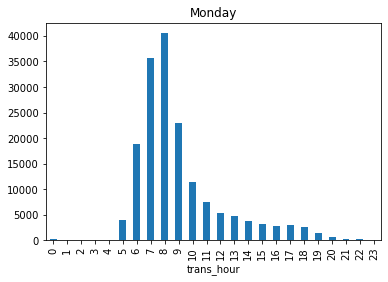

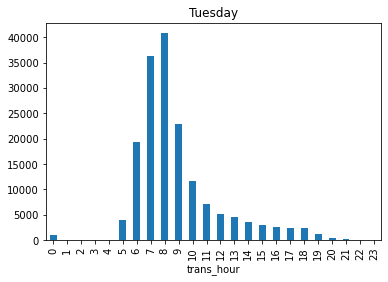

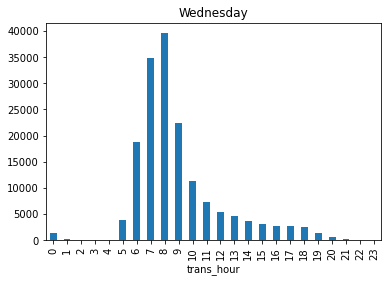

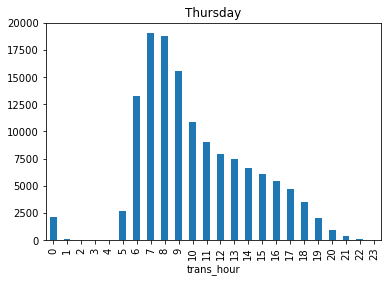

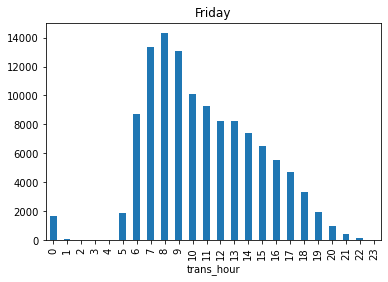

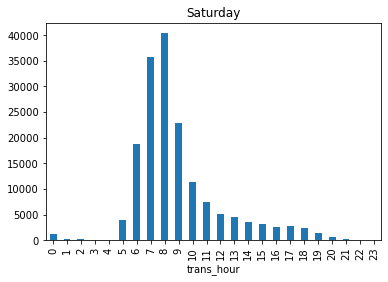

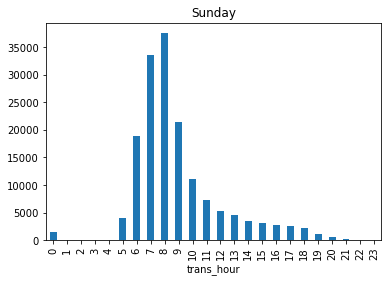

In [33]:
week_days = {0: "Monday",
             1: "Tuesday",
             2: "Wednesday",
             3: "Thursday",
             4: "Friday",
             5: "Saturday",
             6: "Sunday" }

# изобразим по каждому дню недели загруженность по часам транзакций

for i, date in enumerate(df['trans_date'].unique()):
    new_df = df[df['trans_date'] == date]
    res = new_df.groupby(new_df["trans_hour"]).count()
    res['trans_date'].plot.bar(title=week_days[i])
    plt.show()

Что видим? Можем разделить на две категории виды распределений: начало недели + конец недели (понедельник, вторник, среда, суббота, воскресенье) и середина недели (четверг, пятница). 

Преобразуем даты в дни недели и добавим категориальные столбцы - час пик / не час пик, отношение к категории:

|Дни недели| Индикатор |
|---|---|
|Понедельник, вторник, среда, суббота, воскресенье| 0 |
|Четверг, пятница | 1 |


|Часы пик | Значение |
|---|---|
|6, 7, 8, 9 | 1 |
|Остальные| 0 |

In [34]:
week_le = LabelEncoder()
new_week = week_le.fit_transform(df['trans_date'])

df['trans_date'] = new_week
df

,ticket_type_nm,entrance_id,station_id,line_id,pass_dttm,time_to_under,label,ticket_used,trans_date,trans_hour
0,40,2402,11007,11,2022-09-12 05:00:13,216.316667,8001,1,0,5
1,53,110,2006,2,2022-09-12 05:00:54,648.183333,9011,5,0,5
2,53,110,2006,2,2022-09-13 08:09:02,451.116667,9011,5,1,8
3,53,110,2006,2,2022-09-15 09:46:43,468.750000,9011,5,3,9
4,53,110,2006,2,2022-09-17 11:50:21,253.383333,9011,5,5,11
...,...,...,...,...,...,...,...,...,...,...
1091016,40,402,10022,10,2022-09-19 02:00:21,126.400000,10022,1,0,2
1091017,40,2102,3016,3,2022-09-19 02:15:27,89.733333,3016,1,0,2
1091018,40,2283,15005,15,2022-09-19 02:54:50,124.750000,15005,1,0,2
1091019,40,118,2010,2,2022-09-19 03:17:00,91.283333,2010,1,0,3


In [35]:
df['peak_hour'] = 0
df['day_type'] = 0

df.loc[(df['trans_hour'] >= 6) & (df['trans_hour'] <= 9), 'peak_hour'] = 1
df.loc[(df['trans_date'] == 3) | (df['trans_date'] == 4), 'day_type'] = 1

df

,ticket_type_nm,entrance_id,station_id,line_id,pass_dttm,time_to_under,label,ticket_used,trans_date,trans_hour,peak_hour,day_type
0,40,2402,11007,11,2022-09-12 05:00:13,216.316667,8001,1,0,5,0,0
1,53,110,2006,2,2022-09-12 05:00:54,648.183333,9011,5,0,5,0,0
2,53,110,2006,2,2022-09-13 08:09:02,451.116667,9011,5,1,8,1,0
3,53,110,2006,2,2022-09-15 09:46:43,468.750000,9011,5,3,9,1,1
4,53,110,2006,2,2022-09-17 11:50:21,253.383333,9011,5,5,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1091016,40,402,10022,10,2022-09-19 02:00:21,126.400000,10022,1,0,2,0,0
1091017,40,2102,3016,3,2022-09-19 02:15:27,89.733333,3016,1,0,2,0,0
1091018,40,2283,15005,15,2022-09-19 02:54:50,124.750000,15005,1,0,2,0,0
1091019,40,118,2010,2,2022-09-19 03:17:00,91.283333,2010,1,0,3,0,0


In [36]:
# урааааа доделали!!! теперь выберем все нужные колонки и сохраним в новый df

df = df.rename(columns={'ticket_type_nm': 'ticket_type',
                  'ticket_used': 'times_used',
                  'trans_date':'day_of_the_week'})

In [37]:
mydf = df[['ticket_type', 'entrance_id', 'station_id', 'line_id', 'times_used', 'day_of_the_week', 'trans_hour', 'peak_hour', 'day_type', 'time_to_under', 'label']]
mydf.head()

,ticket_type,entrance_id,station_id,line_id,times_used,day_of_the_week,trans_hour,peak_hour,day_type,time_to_under,label
0,40,2402,11007,11,1,0,5,0,0,216.316667,8001
1,53,110,2006,2,5,0,5,0,0,648.183333,9011
2,53,110,2006,2,5,1,8,1,0,451.116667,9011
3,53,110,2006,2,5,3,9,1,1,468.750000,9011
4,53,110,2006,2,5,5,11,0,0,253.383333,9011


__Готово! Вы восхитительны!__

## Шаг 1.3 Немного визуализации данных после преобразования DF

Визуализируем данные, чтобы по-максимуму понимать их особенности. 

In [38]:
mydf.corr()

,ticket_type,entrance_id,station_id,line_id,times_used,day_of_the_week,trans_hour,peak_hour,day_type,time_to_under,label
ticket_type,1.000000,0.015802,0.004747,0.004747,-0.111148,-0.017912,0.100986,-0.081514,0.004820,-0.183867,-0.023247
entrance_id,0.015802,1.000000,0.368080,0.368037,-0.031621,-0.007107,-0.013729,0.026720,0.002305,-0.002029,0.107758
station_id,0.004747,0.368080,1.000000,1.000000,-0.008221,-0.003839,-0.008044,0.010785,0.000637,0.001836,0.193639
line_id,0.004747,0.368037,1.000000,1.000000,-0.008226,-0.003838,-0.008046,0.010781,0.000637,0.001838,0.193630
times_used,-0.111148,-0.031621,-0.008221,-0.008226,1.000000,0.020284,-0.233004,0.198987,-0.004662,0.335656,0.017151
day_of_the_week,-0.017912,-0.007107,-0.003839,-0.003838,0.020284,1.000000,0.149860,-0.174454,0.233657,-0.151724,-0.002405
trans_hour,0.100986,-0.013729,-0.008044,-0.008046,-0.233004,0.149860,1.000000,-0.679417,-0.074910,-0.678177,-0.031774
peak_hour,-0.081514,0.026720,0.010785,0.010781,0.198987,-0.174454,-0.679417,1.000000,0.072348,0.541366,0.026046
day_type,0.004820,0.002305,0.000637,0.000637,-0.004662,0.233657,-0.074910,0.072348,1.000000,0.061542,0.000583
time_to_under,-0.183867,-0.002029,0.001836,0.001838,0.335656,-0.151724,-0.678177,0.541366,0.061542,1.000000,0.033850


<AxesSubplot:>

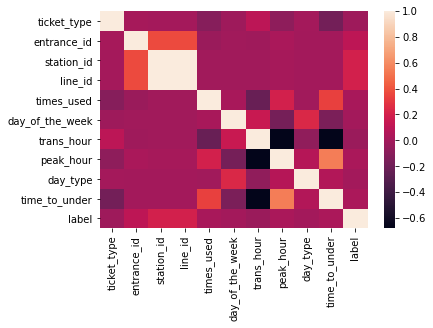

In [39]:
sns.heatmap(mydf.corr())

Интересно, что `peak_hour` коррелирует с переменной, которую необходимо предсказать - `time_to_under`. Класс!! 👍🏻👍🏻👍🏻

Визуализируем зависимости для тех переменных, для которых |`corr_value`| > 0.2 и логически они не имеют взаимосвязи:

- `time_to_under` $\times$ `times_used` (0.34)
- `times_used` $\times$ `trans_hour` (-0.23)


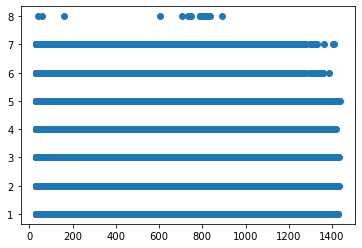

In [40]:
plt.scatter(mydf['time_to_under'], mydf['times_used'])

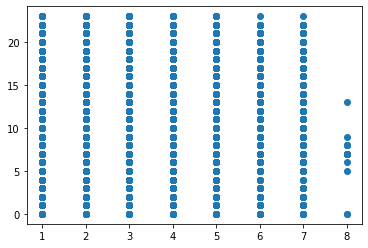

In [41]:
plt.scatter(mydf['times_used'], mydf['trans_hour'])

Отдельно посмотрим на распределения каждого признака:

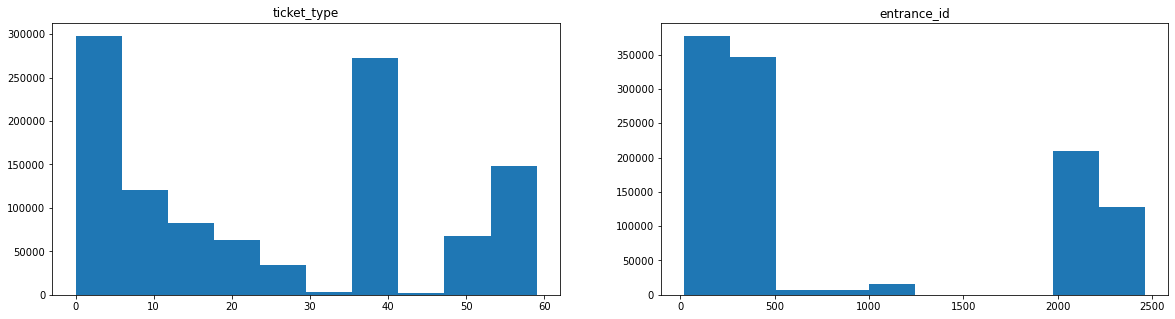

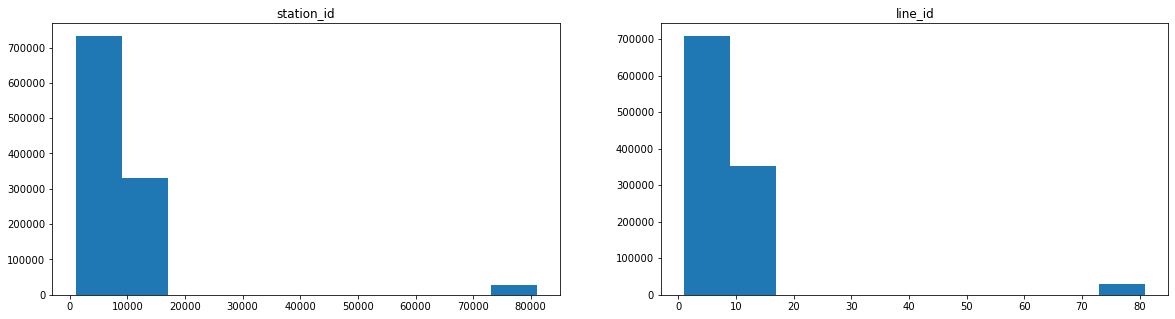

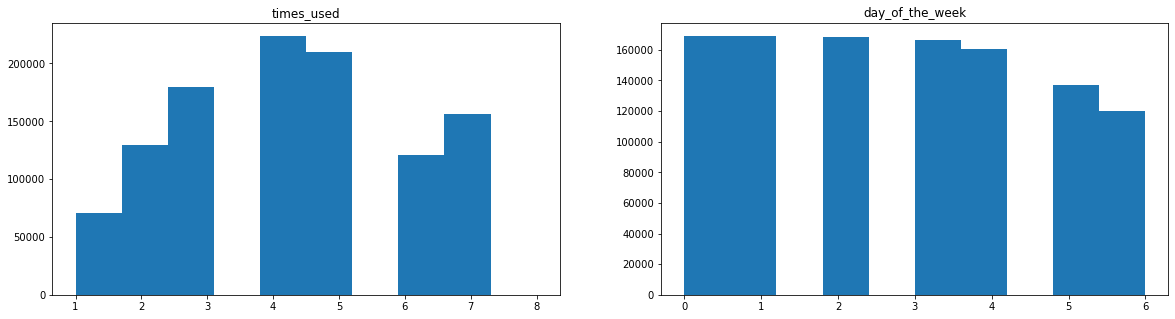

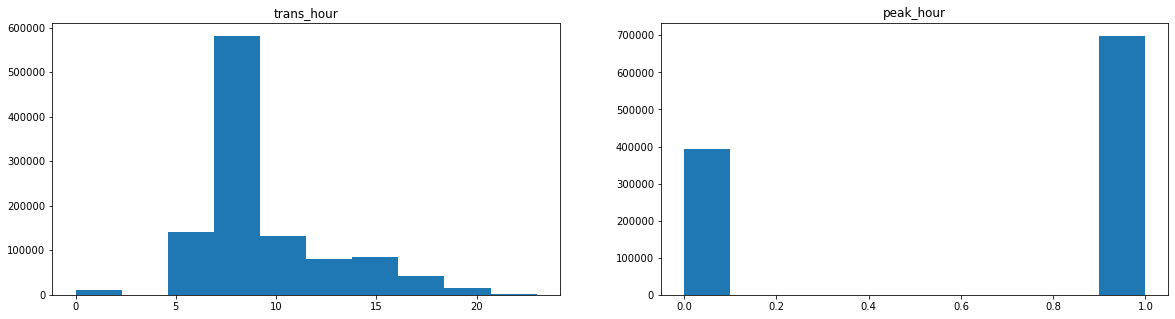

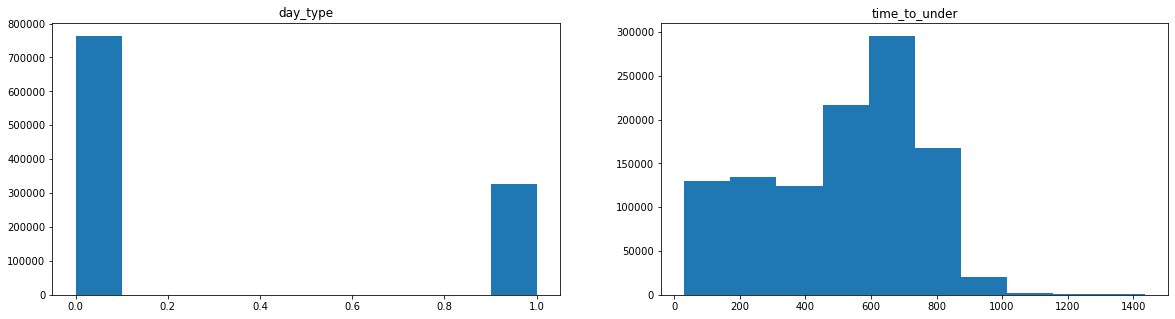

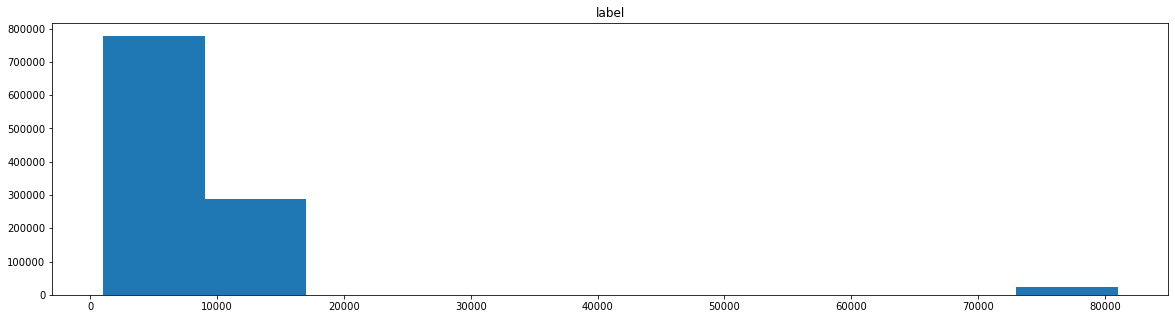

In [42]:
plt.rcParams['figure.figsize'] = [20, 5]

for i in range(0, len(mydf.columns) - 1, 2):
    fig, ax = plt.subplots(1, 2)
    ax[0].set_title(mydf.columns[i])
    ax[0].hist(mydf.iloc[:, i])
    ax[1].hist(mydf.iloc[:, i + 1])
    ax[1].set_title(mydf.columns[i + 1])
    plt.show()
plt.hist(mydf.iloc[:, 10])
plt.title(mydf.columns[10])
plt.show()

Кажется странным, что люди не выходят на станциях с `id` = 2000-7000. Посмотрим в словаре, существуют ли такие айди вообще:

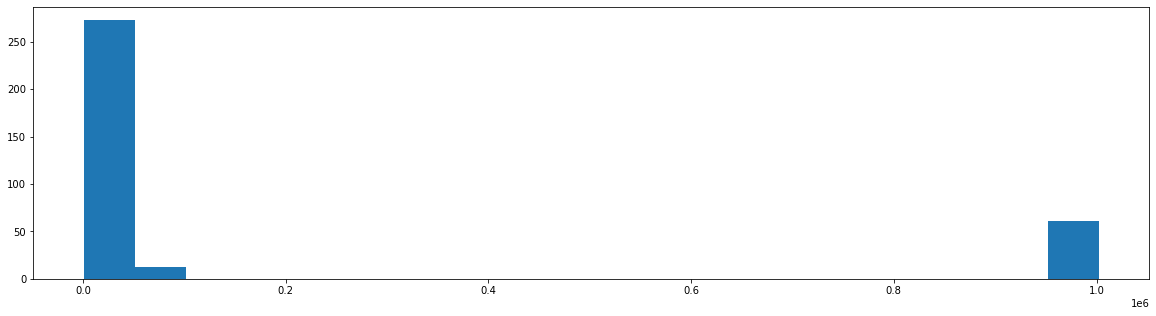

In [43]:
# не существуют. все ок

plt.hist(dictionary['start_station_id'].unique(), bins = 20)
plt.show()

<AxesSubplot:xlabel='trans_hour', ylabel='time_to_under'>

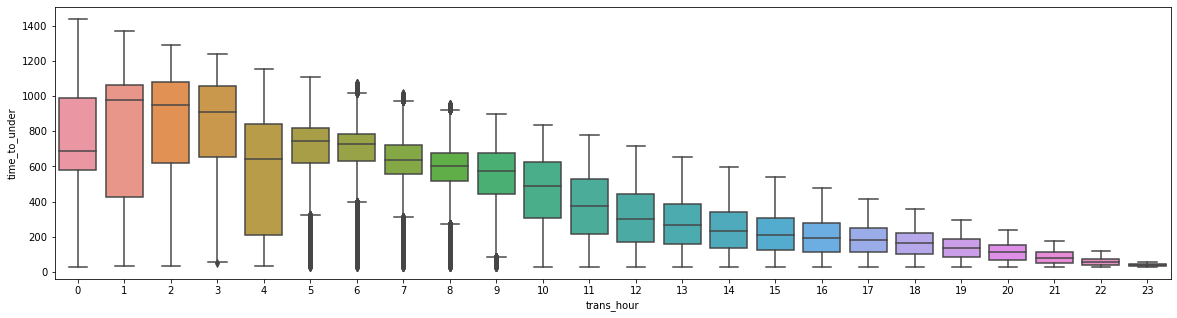

In [44]:
# в час пик очень много выбросов! потому что некоторые люди едут и не на работу...

sns.boxplot(x='trans_hour', y='time_to_under', data=mydf)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b13e9a0790>,
 'caps': [<matplotlib.lines.Line2D at 0x1b13e9a0820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b13e9a0af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b13e44e610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b13e44e910>],
 'means': []}

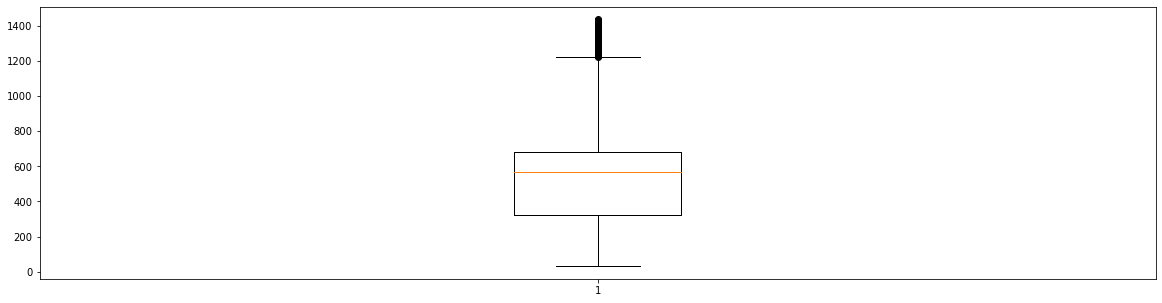

In [45]:
# имеются выбросы у переменной для предикта

plt.boxplot(mydf['time_to_under'])

## Шаг 2. Еще немного и будем предиктить

__Что еще можем сделать?__

1. Т.к. почти все данные дискретные/категориальные, можем применить скейлер только к:
    - `time_to_under` - спорно, но попробуем
    - `trans_hour` и `day_of_the_week` - подойдет стандартизация
2. Можем осуществить отбор признаков средствами `sklearn`

Создадим еще парочку преобразованных датасетов из `mydf`, мало ли, на них регрессоры будут работать лучше...

In [46]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = pd.DataFrame(ss.fit_transform(mydf), columns = mydf.columns)

mydf_scaled = mydf.copy()
mydf_scaled['day_of_the_week'] = scaled['day_of_the_week']
mydf_scaled['trans_hour'] = scaled['trans_hour']

mydf_scaled = mydf_scaled.drop(columns = ['time_to_under', 'label'])
mydf_scaled

,ticket_type,entrance_id,station_id,line_id,times_used,day_of_the_week,trans_hour,peak_hour,day_type
0,40,2402,11007,11,1,-1.441945,-1.267236,0,0
1,53,110,2006,2,5,-1.441945,-1.267236,0,0
2,53,110,2006,2,5,-0.926732,-0.382578,1,0
3,53,110,2006,2,5,0.103694,-0.087692,1,1
4,53,110,2006,2,5,1.134119,0.502080,0,0
...,...,...,...,...,...,...,...,...,...
1091016,40,402,10022,10,1,-1.441945,-2.151893,0,0
1091017,40,2102,3016,3,1,-1.441945,-2.151893,0,0
1091018,40,2283,15005,15,1,-1.441945,-2.151893,0,0
1091019,40,118,2010,2,1,-1.441945,-1.857007,0,0


Теперь осуществим отбор признаков:

In [47]:
from sklearn.feature_selection import SelectKBest, chi2

# дропаем фичи для предикта
mydf_selected = mydf.copy()
mydf_selected = mydf_selected.drop(columns = ['time_to_under', 'label'])
mydf_selected

,ticket_type,entrance_id,station_id,line_id,times_used,day_of_the_week,trans_hour,peak_hour,day_type
0,40,2402,11007,11,1,0,5,0,0
1,53,110,2006,2,5,0,5,0,0
2,53,110,2006,2,5,1,8,1,0
3,53,110,2006,2,5,3,9,1,1
4,53,110,2006,2,5,5,11,0,0
...,...,...,...,...,...,...,...,...,...
1091016,40,402,10022,10,1,0,2,0,0
1091017,40,2102,3016,3,1,0,2,0,0
1091018,40,2283,15005,15,1,0,2,0,0
1091019,40,118,2010,2,1,0,3,0,0


In [48]:
y = mydf[['time_to_under', 'label']]
y

,time_to_under,label
0,216.316667,8001
1,648.183333,9011
2,451.116667,9011
3,468.750000,9011
4,253.383333,9011
...,...,...
1091016,126.400000,10022
1091017,89.733333,3016
1091018,124.750000,15005
1091019,91.283333,2010


In [49]:
mydf_X = mydf.drop(columns=['time_to_under', 'label'])
mydf_X

,ticket_type,entrance_id,station_id,line_id,times_used,day_of_the_week,trans_hour,peak_hour,day_type
0,40,2402,11007,11,1,0,5,0,0
1,53,110,2006,2,5,0,5,0,0
2,53,110,2006,2,5,1,8,1,0
3,53,110,2006,2,5,3,9,1,1
4,53,110,2006,2,5,5,11,0,0
...,...,...,...,...,...,...,...,...,...
1091016,40,402,10022,10,1,0,2,0,0
1091017,40,2102,3016,3,1,0,2,0,0
1091018,40,2283,15005,15,1,0,2,0,0
1091019,40,118,2010,2,1,0,3,0,0


In [51]:
# выбираем k лучших

select_per = SelectKBest(chi2, k=8)
dropped_features = select_per.fit_transform(mydf_selected, y.iloc[:, 0].astype('int'))
dropped_features.shape

(1091021, 8)

In [52]:
# убрали фичу, которая вносила наименьший вклад. это day_type

mydf_selected = pd.DataFrame(mydf_selected, columns = select_per.get_feature_names_out())
mydf_selected

,ticket_type,entrance_id,station_id,line_id,times_used,day_of_the_week,trans_hour,peak_hour
0,40,2402,11007,11,1,0,5,0
1,53,110,2006,2,5,0,5,0
2,53,110,2006,2,5,1,8,1
3,53,110,2006,2,5,3,9,1
4,53,110,2006,2,5,5,11,0
...,...,...,...,...,...,...,...,...
1091016,40,402,10022,10,1,0,2,0
1091017,40,2102,3016,3,1,0,2,0
1091018,40,2283,15005,15,1,0,2,0
1091019,40,118,2010,2,1,0,3,0


In [53]:
# выберем k лучших для предсказания метки `label`

mydf_selected_label = mydf.copy()
mydf_selected_label = mydf_selected_label.drop(columns = ['time_to_under', 'label'])

select_per = SelectKBest(chi2, k=8)
dropped_features = select_per.fit_transform(mydf_selected_label, y.iloc[:, 1].astype('int'))
dropped_features.shape

(1091021, 8)

In [54]:
# то же самое. day_type не вносит вклад в метку

mydf_selected_label = pd.DataFrame(mydf_selected_label, columns = select_per.get_feature_names_out())
mydf_selected_label

,ticket_type,entrance_id,station_id,line_id,times_used,day_of_the_week,trans_hour,peak_hour
0,40,2402,11007,11,1,0,5,0
1,53,110,2006,2,5,0,5,0
2,53,110,2006,2,5,1,8,1
3,53,110,2006,2,5,3,9,1
4,53,110,2006,2,5,5,11,0
...,...,...,...,...,...,...,...,...
1091016,40,402,10022,10,1,0,2,0
1091017,40,2102,3016,3,1,0,2,0
1091018,40,2283,15005,15,1,0,2,0
1091019,40,118,2010,2,1,0,3,0


In [55]:
# дополнительно заскейлим y
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
y_scaled = rs.fit_transform(y[['time_to_under']])

## Шаг 3. Ура, наконец-то предиктить!

Cоберем в сводную таблицу, что мы имеем по датасетам:

|Название переменной| Особенность |
|---|---|
|mydf_X| Начальный датасет фичей|
|mydf_scaled| Заскейленая дата |
|mydf_selected| Дропнута одна фича |
|y| Два параметра, которые предлагается предиктить|
|y_scaled| `time_to_under`, толко заскейленный|

### Шаг 3.1 Поиск time_to_under


Возьмем все методы из `sklearn.ensemble` и `sklearn.tree`, т.к. на таком большом количестве данных они будут работать быстрее + занимать мало памяти (например, гауссу понадобится ~45 гб памяти для аллокации матрицы размера данных)

In [61]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor 
from sklearn.model_selection import train_test_split, cross_val_score

Потестим методы из коробки сначала на 10% данных, чтобы было быстрее.

In [58]:
mydf_X_10 = mydf_X.head(int(len(mydf_X)*(1/10)))
y_10 = y.head(int(len(y) * (1/10)))

X_train, X_test, y_train, y_test = train_test_split(mydf_X_10, y_10, test_size=0.25)

In [58]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train['time_to_under'])
dtr.score(X_test, y_test['time_to_under'])

0.18023368329228395

In [59]:
etr = ExtraTreeRegressor()
etr.fit(X_train, y_train['time_to_under'])
etr.score(X_test, y_test['time_to_under'])

0.07236068463361711

Деревья явно так себе, посмотрим на ансамблевые методы:

In [60]:
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train['time_to_under'])
rfg.score(X_test, y_test['time_to_under'])

0.4305690853722831

In [61]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train['time_to_under'])
gbr.score(X_test, y_test['time_to_under'])

0.44336049519117604

In [62]:
# тоже ну такое
abr = AdaBoostRegressor()
abr.fit(X_train, y_train['time_to_under'])
abr.score(X_test, y_test['time_to_under'])

0.11835437614491284

In [63]:
br = BaggingRegressor()
br.fit(X_train, y_train['time_to_under'])
br.score(X_test, y_test['time_to_under'])

0.40151765594275224

In [64]:
hgbr = HistGradientBoostingRegressor()
hgbr.fit(X_train, y_train['time_to_under'])
hgbr.score(X_test, y_test['time_to_under'])

0.45844049869368986

Оставим RandomForestRegressor и HistGradientBoostingRegressor.

Попробуем применить их ко всему датасету с дефолтными параметрами, а также осуществить кросс-валидацию.

In [62]:
rfr = RandomForestRegressor()
scores = cross_val_score(rfr, mydf_X, y['time_to_under'])
scores.mean()

0.2925698340274301

In [66]:
hgbr = HistGradientBoostingRegressor()
scores_2 = cross_val_score(hgbr, mydf_X, y['time_to_under'])
scores_2.mean()

0.4608502408051457

In [67]:
gbr = GradientBoostingRegressor()
scores_3 = cross_val_score(gbr, mydf_X, y['time_to_under'])
scores_3.mean()

0.44945097674174195

Ок, hgbr лучше. Посмотрим, что он скажет на заскейленные данные:

In [125]:
# чучуть лучше

hgbr = HistGradientBoostingRegressor(categorical_features=[True, False, False, True, True, False, False, True, True])
scores_2 = cross_val_score(hgbr, mydf_scaled, y['time_to_under'])
scores_2.mean()

0.46296583552373444

In [131]:
# а без фичи - хуже

hgbr = HistGradientBoostingRegressor()
scores_2 = cross_val_score(hgbr, mydf_selected, y['time_to_under'])
scores_2.mean()

0.45871755916654244

In [126]:
# лучше не стало. ну и ладно
hgbr = HistGradientBoostingRegressor()
scores_2 = cross_val_score(hgbr, mydf_scaled, y_scaled)
scores_2.mean()

0.4588903801579459

Определились - лучший классификатор HistGradientBoostingRegressor, лучший дф для предикта - scaled. 

In [141]:
hgbr = HistGradientBoostingRegressor(categorical_features=[True, False, False, True, True, False, False, True, True],
                                     loss="squared_error",
                                    learning_rate=0.11,
                                    max_leaf_nodes=50)
scores_time = cross_val_score(hgbr, mydf_scaled, y['time_to_under'])
scores_time.mean()

0.4707152598617281

### Шаг 3.2 Поиск label

Попробуем k ближайших соседей + деревья

In [105]:
from sklearn.neighbors import KNeighborsClassifier

# max 0.2
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train['label'])
knn.score(X_test, y_test['label'])

0.2055286698929462

In [109]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train['label'])
rfc.score(X_test, y_test['label'])

0.32383780612993107

In [121]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train['label'])
score_label = dtc.score(X_test, y_test['label'])
score_label

0.33124358410324095

Лучший классификатор - DecisionTreeClassifier. Попробуем обучить его на всех данных:

In [94]:
dtc = DecisionTreeClassifier()
scores_label = cross_val_score(dtc, mydf_X, y['label'])
scores_label.mean()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 172, in fit
    X, y = self._validate_data(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 591, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py", line 83, in asarray
    return array(a, dtype, copy=False, order=order)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py", line 2072, in __array__
    return np.asarray(self._values, dtype=dtype)
  File "C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py", line 83, in asarray
    return array(a, dtype, copy=False, order=order)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 30.0 MiB for an array with shape (872816, 9) and data type float32

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 172, in fit
    X, y = self._validate_data(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 591, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py", line 83, in asarray
    return array(a, dtype, copy=False, order=order)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py", line 2072, in __array__
    return np.asarray(self._values, dtype=dtype)
  File "C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py", line 83, in asarray
    return array(a, dtype, copy=False, order=order)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 30.0 MiB for an array with shape (872817, 9) and data type float32


О нет нет памяти :( Тогда примем за значение качества значение, посчитанное на 10% данных. Итого полученное качество:

In [123]:
(scores_time.mean() * 0.5 + 0.5 * score_label) * 100

39.702159860291474